In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.optimize as optimize

# import emcee
# import corner
# import george
# from george import kernels

import sys
sys.path.insert(0, '../src')
import gaussianprocessregression as gpr

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

In [4]:
pyplot.rcParams.update({
    'figure.figsize': (8, 6),    # figure size in inches
    'text.usetex': True,
#     "font.family": 'serif',
#     "font.serif": ['Computer Modern'],
    'font.size': 14,
    #'axes.titlesize': 20,
    'axes.labelsize': 20,
    'axes.linewidth': 2,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 14,
    'xtick.major.size': 8,
    'xtick.minor.size': 4, 
    'xtick.major.width': 2,
    'xtick.minor.width': 2,
    'xtick.direction': 'out',
    'ytick.major.size': 8,
    'ytick.minor.size': 4, 
    'ytick.major.width': 2,
    'ytick.minor.width': 2,
    'ytick.direction': 'out',  
    #'axes.prop_cycle'    : cycler('color', 'bgrcmyk'),
    })

# Simple 1D example

In [5]:
x = np.random.uniform(-6.0, 7.0, 40)
#x = np.linspace(-6.0, 7.0, 30)

def func(x):
    return np.sin(2*x*(1.0+0.05*x)) + 0.5*x + 10

sigma = 0.1
y = func(x) + np.random.normal(0.0, sigma, x.shape)
params = np.atleast_2d(x).T

In [6]:
params.shape, y.shape

((40, 1), (40,))

In [15]:
# Instanciate a Gaussian Process model
kernel = C(5.0, (1e-3, 1e3)) * RBF(3.0, (1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-03, 1.0e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [16]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(params, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=2.24**2 * RBF(length_scale=3) + WhiteKernel(noise_level=0.1),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [17]:
print gp.kernel
print gp.kernel_

2.24**2 * RBF(length_scale=3) + WhiteKernel(noise_level=0.1)
8.02**2 * RBF(length_scale=1.25) + WhiteKernel(noise_level=0.0114)


(5.5440211108893696, 15.587239742745091)

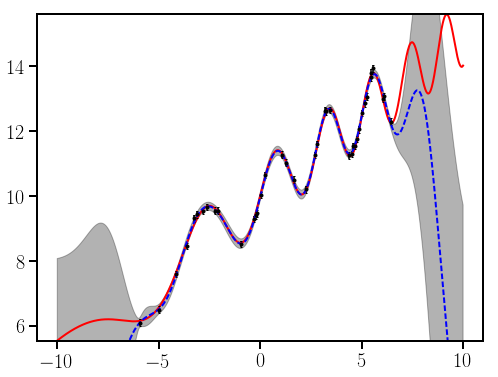

In [18]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
xs = np.atleast_2d(np.linspace(-10, 10, 1000)).T
y_pred, ysigma = gp.predict(xs, return_std=True)

# True values
xall = np.linspace(-10, 10, 1000)
yall = func(xall)

fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(xall, yall, c='r', lw=2)
axes.errorbar(x, y, yerr=sigma, fmt=".k", capsize=1)
axes.plot(xs.flatten(), y_pred, c='b', ls='--', lw=2)
axes.fill_between(xs.flatten(), y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
axes.set_ylim(np.min(yall), np.max(yall))

# 2D simple function with Latin hypercube sampling

256


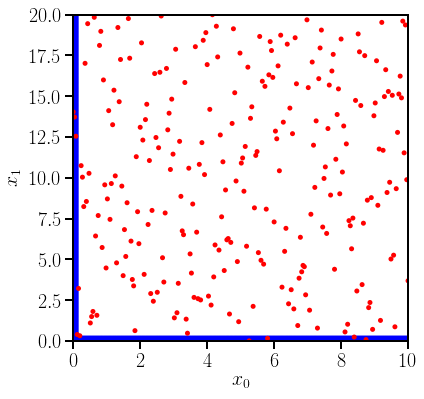

In [30]:
# Make 2d latin hypercube points
Ndata = 256
print Ndata
limits = np.array([[0, 10], [0, 20]])
points = gpr.latin_hypercube(Ndata, limits)

# ******* plot data *******
fig = plt.figure(figsize=(6, 6))

# ****** 1d and 2d projections ******
axes = fig.add_subplot(111)

# for p in points[:, 0]:
#     axes.axvline(p, c='grey', lw=1)

# for p in points[:, 1]:
#     axes.axhline(p, c='grey', lw=1)
    
axes.scatter(min(points[:, 0])+0.0*points[:, 0], points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)
axes.scatter(points[:, 0], min(points[:, 1])+0.0*points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)

axes.scatter(points[:, 0], points[:, 1], c='r', edgecolor='none', marker='o', s=25)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_xlabel(r'$x_0$')
axes.set_ylabel(r'$x_1$')

In [31]:
params = points

# Generate data
def func(x, y):
    return (np.sin(x*(1.0+0.05*x)) + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y

nparams = len(params)
sigma = 1.0e-3
data = np.array([func(params[i, 0], params[i, 1]) for i in range(nparams)]) + np.random.normal(0.0, sigma, nparams)

In [32]:
# Instanciate a Gaussian Process model
kernel = C(5.0, (1e-3, 1e3)) * RBF((3.0, 3.0), (1e0, 1e2)) + WhiteKernel(noise_level=1.0e-5, noise_level_bounds=(1e-10, 1.0e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [33]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(params, data)

/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.69936248e+01,  -5.21358699e-02,  -9.71909205e-03,
         5.51787598e-02]), 'nit': 17, 'funcalls': 74}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=2.24**2 * RBF(length_scale=[3, 3]) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

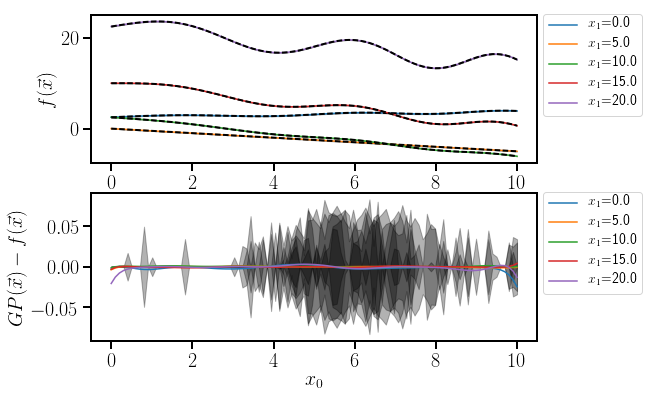

In [34]:
fig, ax = plt.subplots(2, figsize=(8, 6))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y] for x in xs])
    
    true = np.array([func(p[0], p[1]) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))

# 3D simple function with Latin hypercube sampling

In [651]:
# 3d grid
nx = ny = nz = 3
limits = np.array([[0, 10], [0, 20], [0, 30]])
xs = np.linspace(limits[0, 0], limits[0, 1], nx)
ys = np.linspace(limits[1, 0], limits[1, 1], ny)
zs = np.linspace(limits[2, 0], limits[2, 1], nz)
points = np.array([[[[x, y, z] for z in zs] for y in ys] for x in xs]).reshape(nx*ny*nz, 3)

In [653]:
# Make 3d latin hypercube points
Ndata = 3**3
print Ndata, Ndata**(1.0/3.0)
limits = np.array([[0, 10], [0, 20], [0, 30]])
points = gpr.latin_hypercube(Ndata, limits)

27 3.0


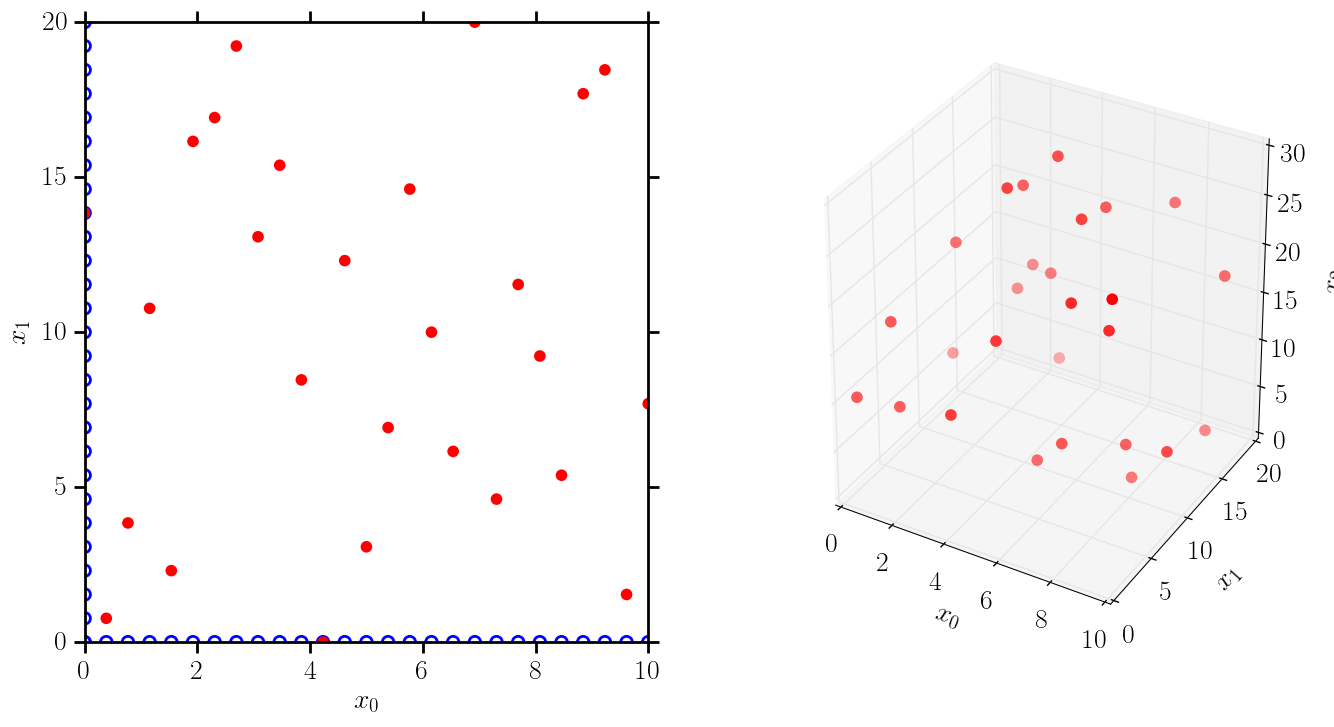

In [654]:
# ******* plot data *******
fig = plt.figure(figsize=(16, 8))

# ****** 1d and 2d projections ******
axes = fig.add_subplot(121)

# for p in points[:, 0]:
#     axes.axvline(p, c='grey', lw=1)

# for p in points[:, 1]:
#     axes.axhline(p, c='grey', lw=1)
    
axes.scatter(min(points[:, 0])+0.0*points[:, 0], points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)
axes.scatter(points[:, 0], min(points[:, 1])+0.0*points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)

axes.scatter(points[:, 0], points[:, 1], c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_xlabel(r'$x_0$')
axes.set_ylabel(r'$x_1$')


# ****** Full 3d data ******
axes = fig.add_subplot(122, projection='3d')

x, y, z = points[:, 0], points[:, 1], points[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_zlim(limits[2])
axes.set_xlabel(r'$x_0$', labelpad=10)
axes.set_ylabel(r'$x_1$', labelpad=15)
axes.set_zlabel(r'$x_2$', labelpad=18)

In [655]:
params = points

# Generate data
# def func(x, y, z):
#     return (np.sin(1.5*x*(1.0+0.05*x)) + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y + 0.02*z**2

# def func(x, y, z):
#     return (1.5*x*(1.0+0.05*x) + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y + 0.02*z**2

def func(x, y, z):
    return (2.0*np.sin(0.5*x*(1.0+0.05*x)) - 0.3*(x-5.0)**2 + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y + 0.02*z**2

nparams = len(params)
sigma = 1.0e-3
data = np.array([func(params[i, 0], params[i, 1], params[i, 2]) for i in range(nparams)]) + np.random.normal(0.0, sigma, nparams)

data.min(), data.max()

(-5.7079932313592447, 19.1858885903887)

In [656]:
# Instanciate a Gaussian Process model
kernel = C(5.0, (1e-3, 1e3)) * RBF((3.0, 3.0, 3.0), (1e0, 1e2)) + WhiteKernel(noise_level=1.0e-5, noise_level_bounds=(1e-10, 1.0e-1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(params, data)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=2.24**2 * RBF(length_scale=[3, 3, 3]) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

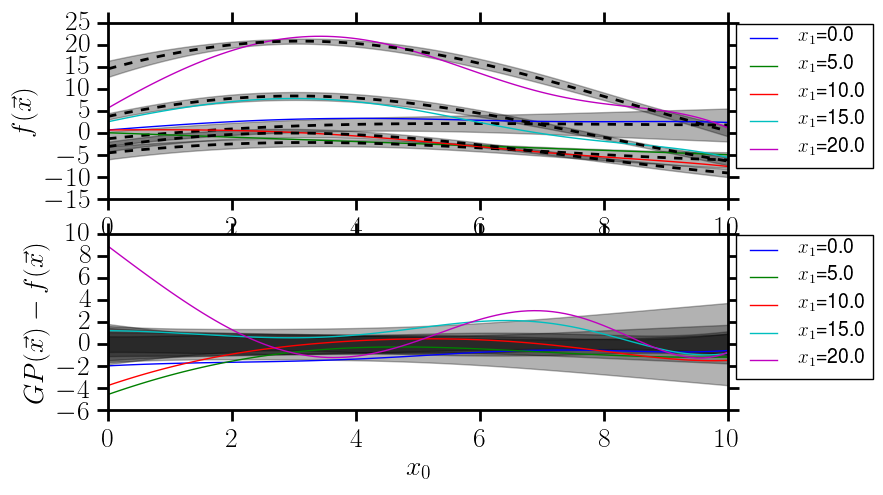

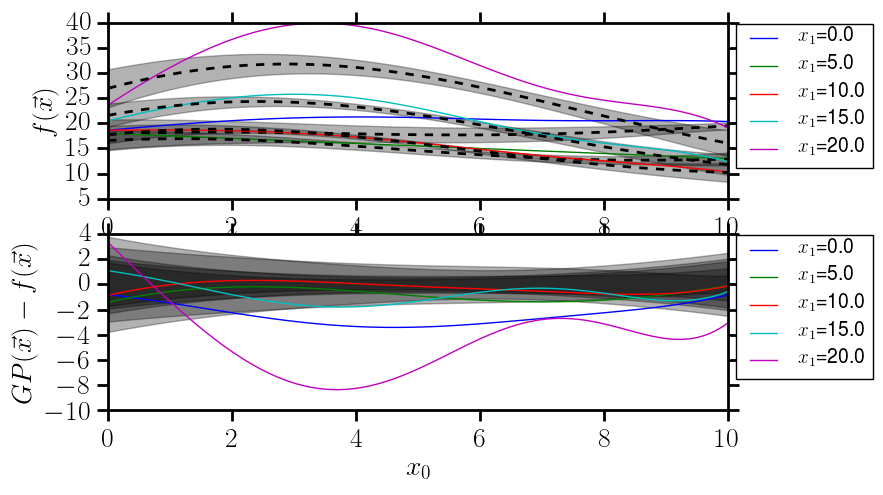

In [657]:
z = 0

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z] for x in xs])
    
    true = np.array([func(p[0], p[1], p[2]) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))


z = 30

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z] for x in xs])
    
    true = np.array([func(p[0], p[1], p[2]) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))

# 5D simple function with Latin hypercube sampling

1024 4.0


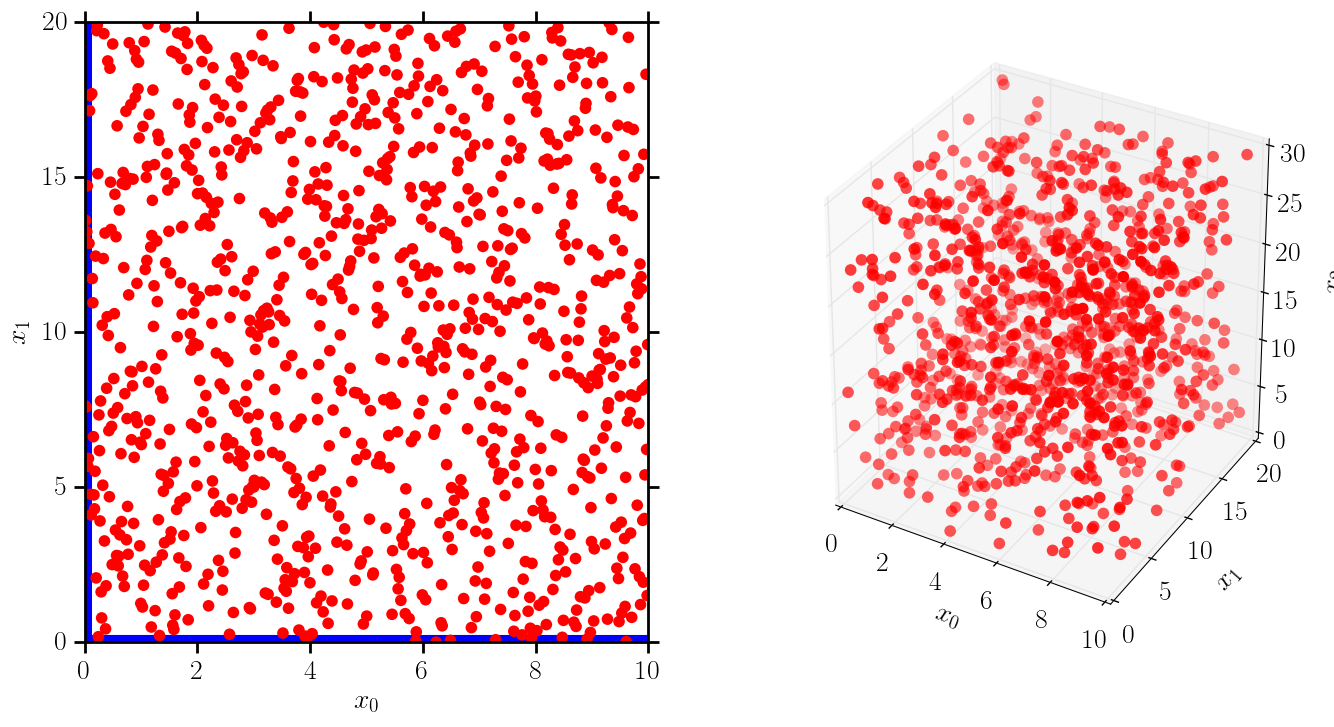

In [721]:
# Make 2d latin hypercube points
Ndata = 4**5
print Ndata, Ndata**(1.0/5.0)
limits = np.array([[0, 10], [0, 20], [0, 30], [0, 40], [0, 50]])
points = gpr.latin_hypercube(Ndata, limits)

# ******* plot data *******
fig = plt.figure(figsize=(16, 8))

# ****** 1d and 2d projections ******
axes = fig.add_subplot(121)

# for p in points[:, 0]:
#     axes.axvline(p, c='grey', lw=1)

# for p in points[:, 1]:
#     axes.axhline(p, c='grey', lw=1)
    
axes.scatter(min(points[:, 0])+0.0*points[:, 0], points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)
axes.scatter(points[:, 0], min(points[:, 1])+0.0*points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)

axes.scatter(points[:, 0], points[:, 1], c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_xlabel(r'$x_0$')
axes.set_ylabel(r'$x_1$')


# ****** Full 3d data ******
axes = fig.add_subplot(122, projection='3d')

x, y, z = points[:, 0], points[:, 1], points[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_zlim(limits[2])
axes.set_xlabel(r'$x_0$', labelpad=10)
axes.set_ylabel(r'$x_1$', labelpad=15)
axes.set_zlabel(r'$x_2$', labelpad=18)

In [722]:
params = points

# Generate data
# def func(x, y, z):
#     return (np.sin(1.5*x*(1.0+0.05*x)) + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y + 0.02*z**2
def func(x):
    return (np.sin(0.5*x[0]*(1.0+0.05*x[0])) + 0.5*x[0] + 10)*0.01*(x[1]-5.0)**2\
    - 0.1*x[0]*x[1] + 0.02*x[2]**2 + 0.02*x[3]**2 - 0.02*(x[4]-5)*x[3]

nparams = len(params)
sigma = 1.0e-2
data = np.array([func(params[i]) for i in range(nparams)]) + np.random.normal(0.0, sigma, nparams)

In [723]:
func(np.array([3, 3, 3, 40, 0])), data.min(), data.max()

(35.779525366180152, -12.455620398571623, 57.056110038585629)

In [724]:
# Instanciate a Gaussian Process model
kernel = C(5.0, (1e-3, 1e3)) * RBF((3.0, 3.0, 3.0, 3.0, 3.0), (1e0, 1e2)) + WhiteKernel(noise_level=1.0e-5, noise_level_bounds=(1e-10, 1.0e-1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(params, data)

/Users/lackey/virtenvs/aei/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03800257,  0.13950848,  0.11787059,  0.10305367,  0.12663583,
        0.07130385, -0.00540144]), 'nit': 19, 'funcalls': 64}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=2.24**2 * RBF(length_scale=[3, 3, 3, 3, 3]) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

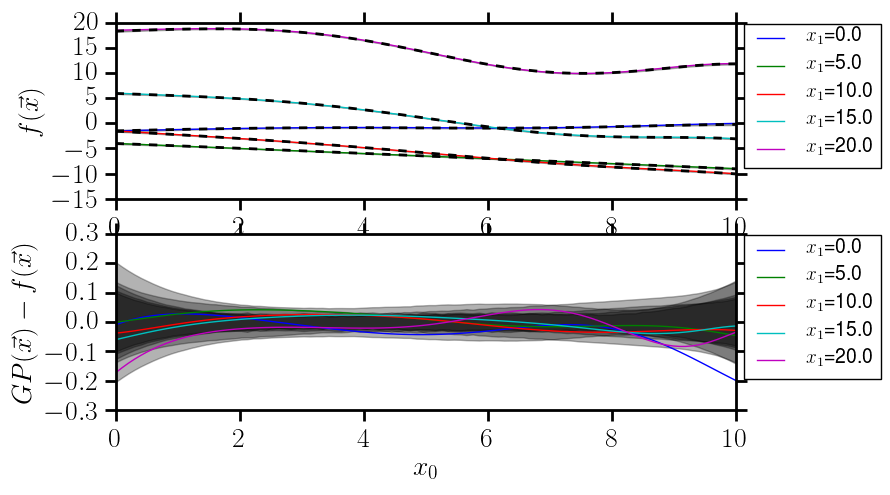

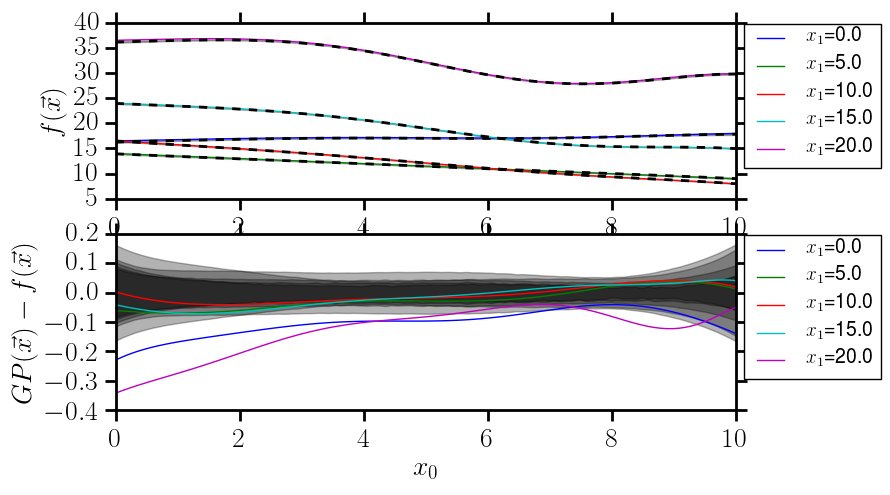

In [725]:
z1 = 40
z2 = 50

z = 0

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z, z1, z2] for x in xs])
    
    true = np.array([func(p) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))


z = 30

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z, z1, z2] for x in xs])
    
    true = np.array([func(p) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))

# 9D simple function with Latin hypercube sampling

4096 2.51984209979


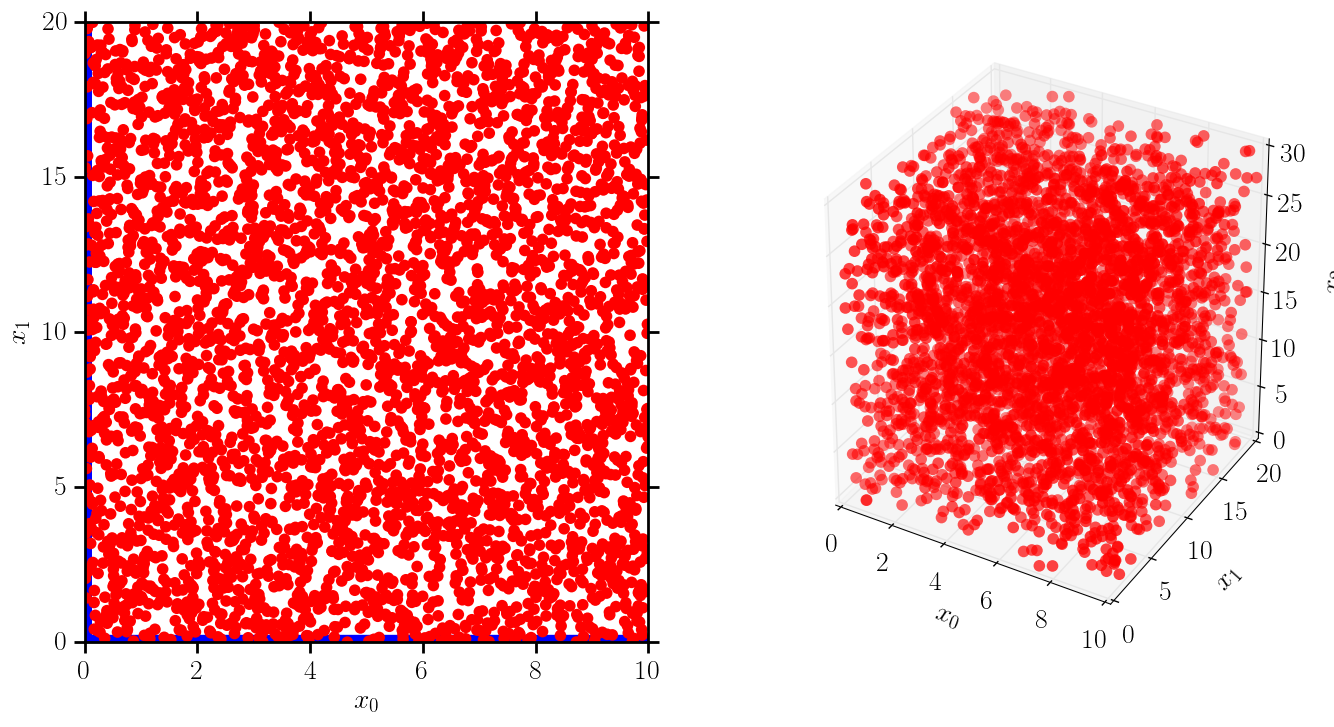

In [780]:
# Make 9d latin hypercube points
Ndata = 4096
print Ndata, Ndata**(1.0/9.0)
limits = np.array([[0, 10], [0, 20], [0, 30], [0, 40], [0, 50], [0, 60], [0, 70], [0, 80], [0, 90]])
points = gpr.latin_hypercube(Ndata, limits)

# ******* plot data *******
fig = plt.figure(figsize=(16, 8))

# ****** 1d and 2d projections ******
axes = fig.add_subplot(121)

# for p in points[:, 0]:
#     axes.axvline(p, c='grey', lw=1)

# for p in points[:, 1]:
#     axes.axhline(p, c='grey', lw=1)
    
axes.scatter(min(points[:, 0])+0.0*points[:, 0], points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)
axes.scatter(points[:, 0], min(points[:, 1])+0.0*points[:, 1], marker='o', s=70, c='none', edgecolors='b', linewidth=2)

axes.scatter(points[:, 0], points[:, 1], c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_xlabel(r'$x_0$')
axes.set_ylabel(r'$x_1$')


# ****** Full 3d data ******
axes = fig.add_subplot(122, projection='3d')

x, y, z = points[:, 0], points[:, 1], points[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='o', s=70)

axes.set_xlim(limits[0])
axes.set_ylim(limits[1])
axes.set_zlim(limits[2])
axes.set_xlabel(r'$x_0$', labelpad=10)
axes.set_ylabel(r'$x_1$', labelpad=15)
axes.set_zlabel(r'$x_2$', labelpad=18)

In [781]:
params = points

# Generate data
# def func(x, y, z):
#     return (np.sin(1.5*x*(1.0+0.05*x)) + 0.5*x + 10)*0.01*(y-5.0)**2 - 0.1*x*y + 0.02*z**2
def func(x):
    return 5.0*(np.sin(0.5*x[0]*(1.0+0.05*x[0])) + 0.5*x[0] + 10)*0.01*(x[1]-5.0)**2\
    - 0.1*x[0]*x[1] + 0.02*x[2]**2 + 0.02*x[3]**2 - 0.02*(x[4]-5)*x[3]\
    - 0.1*x[5]*x[6] + 0.02*x[7]**2 + 0.02*x[8]**2 - 0.02*(x[7]-5)*x[8]

nparams = len(params)
sigma = 1.0e-2
data = np.array([func(params[i]) for i in range(nparams)]) + np.random.normal(0.0, sigma, nparams)

In [782]:
func(np.array([3, 3, 3, 40, 0, 3, 3, 3, 3])), data.min(), data.max()

(37.357626830900777, -388.97642517274653, 257.30491221960204)

In [783]:
# Instanciate a Gaussian Process model
kernel = C(5.0, (1e-3, 1e3)) * RBF((3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0), (1e0, 1e2)) + WhiteKernel(noise_level=1.0e-5, noise_level_bounds=(1e-10, 1.0e-1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(params, data)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=2.24**2 * RBF(length_scale=[3, 3, 3, 3, 3, 3, 3, 3, 3]) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=9, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

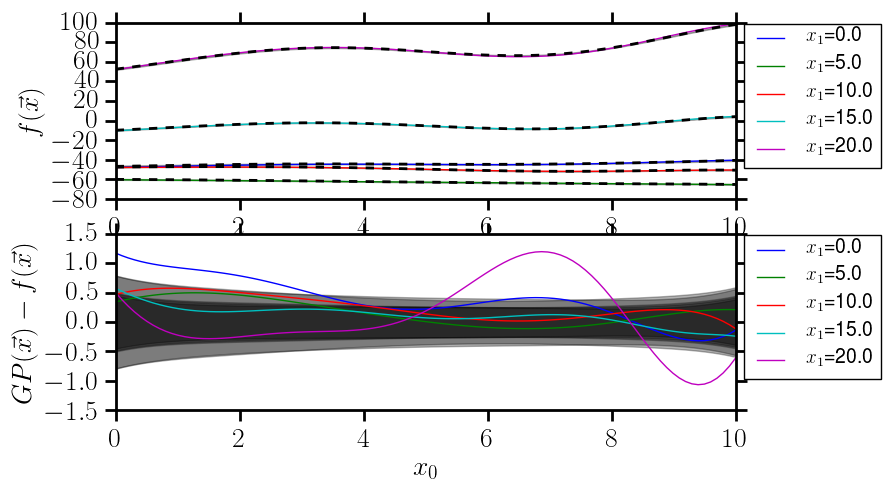

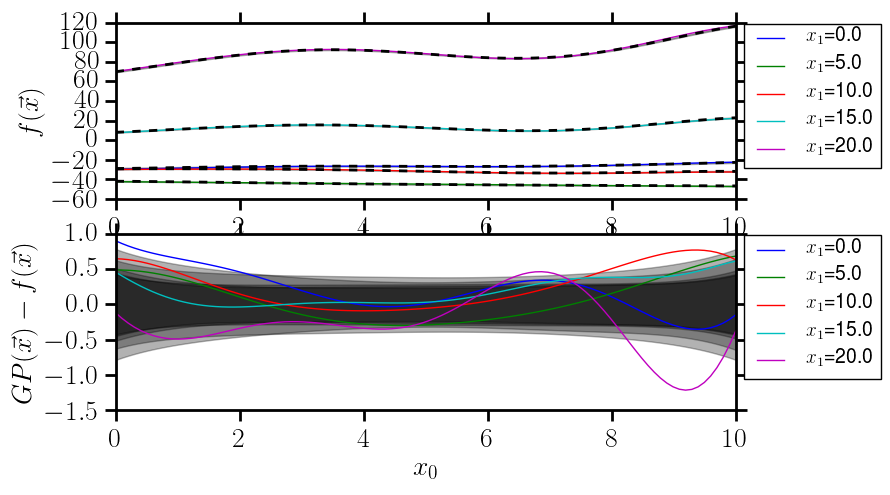

In [784]:
z1 = 40
z2 = 50
z3 = 25
z4 = 30
z5 = 25
z6 = 30

z = 0

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z, z1, z2, z3, z4, z5, z6] for x in xs])
    
    true = np.array([func(p) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))


z = 30

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z, z1, z2, z3, z4, z5, z6] for x in xs])
    
    true = np.array([func(p) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))

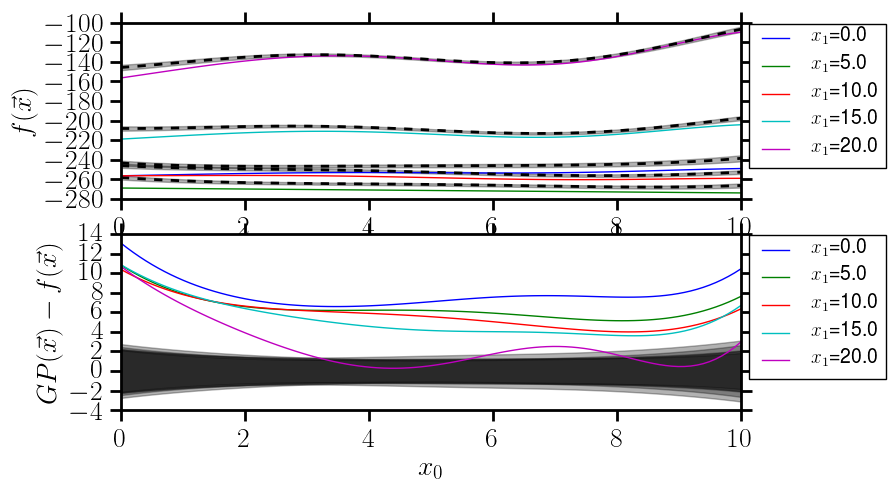

In [791]:
z1 = 40
z2 = 50
z3 = 60
z4 = 70
z5 = 80
z6 = 90

z = 30

fig, ax = plt.subplots(2, figsize=(8, 5))
for y in np.linspace(0, 20, 5):
    xs = np.linspace(0, 10, 100)
    ps = np.array([[x, y, z, z1, z2, z3, z4, z5, z6] for x in xs])
    
    true = np.array([func(p) for p in ps])
    ax[0].plot(xs, true, label=r'$x_1$='+str(y))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(xs, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(xs, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    ax[1].plot(xs, (y_pred-true), label=r'$x_1$='+str(y))
    ax[1].fill_between(xs, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))

In [ ]:
2**7

In [792]:
# validation set
Ndata = 10000
vps = gpr.uniform_random_samples(Ndata, limits)

In [793]:
vps_data = np.array([func(p) for p in vps])
gpps_data, ysigma = gp.predict(vps, return_std=True)

In [794]:
frange = np.max(vps_data) - np.min(vps_data)
print frange

703.104577164


In [795]:
np.max(np.abs(gpps_data - vps_data))

9.0963898184183165

In [796]:
np.max(np.abs(gpps_data - vps_data)) / frange

0.012937463520877683